In [1]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt  
import numpy as np
import seaborn as sns



# Depreicated

***This file was downloaded directly to the laptop.  Since it's available for download, there is no API call made.  You'll have to download this yourself. http://inalitic.com/datasets/nhl%20player%20data.html*** 

In [2]:
df = pd.read_csv('skater_stats.csv', encoding='latin1')

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# New API

In [3]:
teamgoalsdict = {}
yeardict = {}
listofgoalgpgBefore = []

# For each year that there was an NHL season 
# for i in range(10):
#     year = 1993+i
#     year2 = year+1
#     if year != 2004:
#         yearhtml = 'https://statsapi.web.nhl.com/api/v1/teams?expand=team.stats&season=' + str(year) + str(year2)
#         r = requests.get(yearhtml, auth=('user', 'pass'))
#         nestdict = r.json()
#         for i in [26, 26, 26, 26, 26, 27, 28, 30, 30, 30]:
#             name = nestdict['teams'][i]['teamStats'][0]['splits'][0]['team']['name']
#             goalsPerGame = nestdict['teams'][i]['teamStats'][0]['splits'][0]['stat']['goalsPerGame']
#             listofgoalgpgBefore.append(goalsPerGame)
# 
# 'goalsPerGame'

seasonindices = ['19931994', '19941995', '19951996', '19961997', '19971998', '19981999', '19992000', '20002001', '20012002', '20022003']
# seasonindices = ['19981999', '19992000', '20002001', '20012002', '20022003']

for index in seasonindices:
    print(index)
    yearhtml = 'https://statsapi.web.nhl.com/api/v1/teams?expand=team.stats&season=' + index
    r = requests.get(yearhtml, auth=('user', 'pass'))
    nestdict = r.json()
    for i in range(len(nestdict['teams'])):
        name = nestdict['teams'][i]['teamStats'][0]['splits'][0]['team']['name']
        goalsPerGame = nestdict['teams'][i]['teamStats'][0]['splits'][0]['stat']['goalsPerGame']
        listofgoalgpgBefore.append(goalsPerGame)


seasonindicesaft = ['20062007', '20072008', '20082009', '20092010', '20102011', '20112012', '20122013', '20132014', '20142015', '20152016']
# seasonindicesaft = ['20112012', '20122013', '20132014', '20142015', '20152016']
listofgoalgpgAfter = []

for index in seasonindicesaft:
    print(index)
    yearhtml = 'https://statsapi.web.nhl.com/api/v1/teams?expand=team.stats&season=' + index
    r = requests.get(yearhtml, auth=('user', 'pass'))
    nestdict = r.json()
    for i in range(len(nestdict['teams'])):
        name = nestdict['teams'][i]['teamStats'][0]['splits'][0]['team']['name']
        goalsPerGame = nestdict['teams'][i]['teamStats'][0]['splits'][0]['stat']['goalsPerGame']
        listofgoalgpgAfter.append(goalsPerGame)        
        

        

19931994
19941995
19951996
19961997
19971998
19981999
19992000
20002001
20012002
20022003
20062007
20072008
20082009
20092010
20102011
20112012
20122013
20132014
20142015
20152016


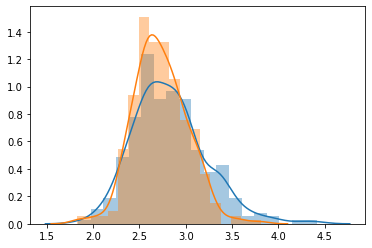

In [4]:
sns.distplot(listofgoalgpgBefore)
sns.distplot(listofgoalgpgAfter)

For relatively normal graphs, the mean should equal the median.  This is just a quick and dirty way of determining normality.  Probably not the best way, but should be good enough.

In [5]:
np.mean(np.array(listofgoalgpgAfter))/np.median(np.array(listofgoalgpgAfter))

1.0070877970693264

Still gonna bootstrap.  But here is a look without bootstrapping.

In [9]:
import scipy.stats as stats
import statsmodels.stats as sm

stats.ttest_ind(listofgoalgpgBefore, listofgoalgpgAfter)

# print(np.average(np.array(listofgoalgpgBefore)), np.average(np.array(listofgoalgpgAfter)))

Ttest_indResult(statistic=3.442300149495998, pvalue=0.000618864598146791)

### Bootstrapping

In [14]:
sampledgpgBefore = []
sampledgpgAfter = []
bootstrap_means_before = []
bootstrap_means_after = []

for iteration in range(500):
    for gpgs in range(10):
        sampledgpgBefore.append(np.random.choice(listofgoalgpgBefore))
        sampledgpgAfter.append(np.random.choice(listofgoalgpgAfter))
    bootstrap_means_before.append(np.average(sampledgpgBefore))
    bootstrap_means_after.append(np.average(sampledgpgAfter))

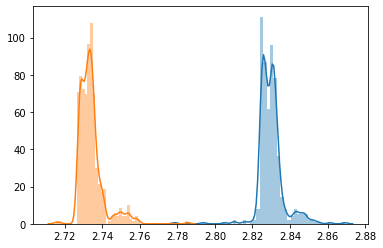

In [15]:
sns.distplot(bootstrap_means_before)
sns.distplot(bootstrap_means_after)

In [16]:
stats.ttest_ind(bootstrap_means_before, bootstrap_means_after)

Ttest_indResult(statistic=225.98468642619412, pvalue=0.0)

Ok so...not the same. Clearly not the same.

# Let's look at ages now

#### H0: There is *not* a statistically significant point decrease in players once they've turned 31.

#### Ha: There is a statistically significant point decrease in players once they've turned 31.

In [41]:
df = df.drop('Unnamed: 0', axis = 1)


KeyError: "['Unnamed: 0'] not found in axis"

In [53]:
df.loc[((df.Age == 30.0) | (df.Age == 31)) & (df.Player == "Rick Nash")]

Season     Player   Age     Tm   Pos  GP     G     GPG     A   PTS  ...  \
1976    2016  Rick Nash  31.0   NYR    LW   60   15   0.2500   21    36   ...   
2695    2015  Rick Nash  30.0   NYR    LW   79   42   0.5316   27    69   ...   

      SHA      S    S%      TOI   ATOI   BLK   HIT FOwin FOloss   FO%  
1976   1    183     8    1,016   16:56  24.0  69.0   0.0    1.0   0.0  
2695   1    304    14    1,379   17:27  33.0  45.0   2.0    2.0  50.0  

[2 rows x 28 columns]

In [70]:
# I want a list of 30 year old NHL players to start with

# players_30 = []
p

series_30 = df.loc[df.Age == 30.0].Player
series_31 = df.loc[df.Age == 31.0].Player



for items30 in series_30.iteritems():
    

for items30 in series_30.iteritems():
    if series_31.str.contains(pat = items30):
#         sr.str.contains(pat = 'is') 
        players3031.append(items30)
#     print(series_30.iteritems)
#     if items30 is in series31.iteritems()
#     pass



TypeError: first argument must be string or compiled pattern

In [121]:
players_30 = []
df_30 = df.loc[df.Age == 30.0]
df_31 = df.loc[df.Age == 31.0]
series_30 = df_30.Player
series_31 = df_31.Player
player_dict_30 = {}
player_dict_31 = {}

for item30 in series_30.iteritems():
    if item30 not in player_dict_30.keys():
        if item30[1].endswith('*'):
#             print(item30[1][:-1])
#             player_dict[item30[1]] = df.iloc[item30[0]]
#             print(item30[0], item30[1].endswith('*'))
            player_dict_30[item30[1][:-1]] = df.iloc[item30[0], [9, 5]]
        else:
#             print(item30[1])
            player_dict_30[item30[1]] = df.iloc[item30[0], [9, 5]]
    
for item31 in series_31.iteritems():
    if item31 not in player_dict_31.keys():
        if item31[1].endswith('*'):
            player_dict_31[item31[1][:-1]] = df.iloc[item31[0], [9, 5]]
        else:
            player_dict_31[item31[1]] = df.iloc[item31[0], [9, 5]]
    

    
    

In [122]:
for key in player_dict_30.keys():
    if key in player_dict_31.keys():
        print(f'{key}: {player_dict_31[key]} and {player_dict_30[key]}')

Mike Blunden: PTS     -   
GP         1
Name: 67, dtype: object and PTS     -   
GP         2
Name: 949, dtype: object
Jared Boll: PTS     1 
GP      10
Name: 71, dtype: object and PTS     3 
GP      51
Name: 953, dtype: object
Tyler Bozak: PTS     43 
GP       81
Name: 87, dtype: object and PTS     55 
GP       78
Name: 965, dtype: object
Chris Butler: PTS     -   
GP         6
Name: 110, dtype: object and PTS     -   
GP         1
Name: 983, dtype: object
Blake Comeau: PTS     34 
GP       79
Name: 152, dtype: object and PTS     20 
GP       77
Name: 1024, dtype: object
David Desharnais: PTS     28 
GP       71
Name: 192, dtype: object and PTS     14 
GP       49
Name: 1058, dtype: object
Derek Dorsett: PTS     9 
GP      20
Name: 202, dtype: object and PTS     4 
GP      14
Name: 1069, dtype: object
Brandon Dubinsky: PTS     16 
GP       62
Name: 208, dtype: object and PTS     41 
GP       80
Name: 1076, dtype: object
Alexander Edler: PTS     34 
GP       70
Name: 221, dtype: object

Name: 5928, dtype: object
Andrew Alberts: PTS     1 
GP      24
Name: 5116, dtype: object and PTS     3 
GP      44
Name: 5940, dtype: object
Brian McGrattan: PTS     3 
GP      21
Name: 5063, dtype: object and PTS     2 
GP      30
Name: 6002, dtype: object
Bracken Kearns: PTS     -   
GP         1
Name: 5218, dtype: object and PTS     -   
GP         5
Name: 6113, dtype: object
Greg Rallo: PTS     1 
GP      10
Name: 5156, dtype: object and PTS     -   
GP         1
Name: 6147, dtype: object
Nolan Yonkman: PTS     -   
GP         7
Name: 5282, dtype: object and PTS     -   
GP         1
Name: 6174, dtype: object
Daniel Sedin: PTS     67 
GP       72
Name: 5313, dtype: object and PTS     104 
GP        82
Name: 6177, dtype: object
Henrik Sedin: PTS     81 
GP       82
Name: 5290, dtype: object and PTS     94 
GP       82
Name: 6180, dtype: object
Henrik Zetterberg: PTS     69 
GP       82
Name: 5307, dtype: object and PTS     80 
GP       80
Name: 6185, dtype: object
Brad Richards: PT

Name: 9782, dtype: object
Chris Clark: PTS     9 
GP      18
Name: 9351, dtype: object and PTS     54 
GP       74
Name: 9789, dtype: object
Petr Sykora: PTS     63 
GP       81
Name: 8885, dtype: object and PTS     53 
GP       82
Name: 9794, dtype: object
Matt Cullen: PTS     49 
GP       59
Name: 8939, dtype: object and PTS     41 
GP       80
Name: 9851, dtype: object
Brett Clark: PTS     21 
GP       57
Name: 9159, dtype: object and PTS     39 
GP       82
Name: 9860, dtype: object
Filip Kuba: PTS     31 
GP       75
Name: 9067, dtype: object and PTS     37 
GP       81
Name: 9879, dtype: object
Mikael Samuelsson: PTS     40 
GP       73
Name: 8988, dtype: object and PTS     34 
GP       53
Name: 9903, dtype: object
Steve Reinprecht: PTS     46 
GP       81
Name: 8950, dtype: object and PTS     33 
GP       49
Name: 9910, dtype: object
Mattias Ohlund: PTS     24 
GP       53
Name: 9131, dtype: object and PTS     31 
GP       77
Name: 9926, dtype: object
Ed Jovanovski: PTS     51 


Tim Taylor: PTS     7 
GP      38
Name: 14411, dtype: object and PTS     20 
GP       76
Name: 15475, dtype: object
Rob Zamuner: PTS     37 
GP       79
Name: 14805, dtype: object and PTS     21 
GP       57
Name: 15488, dtype: object
Joe Sacco: PTS     14 
GP       69
Name: 14536, dtype: object and PTS     23 
GP       79
Name: 15511, dtype: object
Scott Pellerin: PTS     44 
GP       77
Name: 14841, dtype: object and PTS     23 
GP       80
Name: 15512, dtype: object
Len Barrie: PTS     23 
GP       60
Name: 14680, dtype: object and PTS     23 
GP       60
Name: 15519, dtype: object
Stephane Matteau: PTS     32 
GP       80
Name: 14764, dtype: object and PTS     24 
GP       69
Name: 15524, dtype: object
Steve Heinze: PTS     54 
GP       79
Name: 14890, dtype: object and PTS     25 
GP       75
Name: 15541, dtype: object
Josef Beranek: PTS     23 
GP       70
Name: 14679, dtype: object and PTS     25 
GP       71
Name: 15544, dtype: object
Mathieu Schneider: PTS     51 
GP       73


Name: 18933, dtype: object
Don McSween: PTS     -   
GP         4
Name: 18191, dtype: object and PTS     -   
GP         2
Name: 18968, dtype: object
Oleg Mikulchik: PTS     -   
GP         8
Name: 18190, dtype: object and PTS     2 
GP      25
Name: 19092, dtype: object
Mark Lamb: PTS     -   
GP         1
Name: 18201, dtype: object and PTS     3 
GP      47
Name: 19138, dtype: object
Joe Kocur: PTS     4 
GP      45
Name: 18369, dtype: object and PTS     3 
GP      48
Name: 19139, dtype: object
Alexei Gusarov: PTS     20 
GP       65
Name: 18619, dtype: object and PTS     3 
GP      14
Name: 19142, dtype: object
Ken Daneyko: PTS     6 
GP      80
Name: 18419, dtype: object and PTS     3 
GP      25
Name: 19149, dtype: object
Frantisek Musil: PTS     4 
GP      65
Name: 18363, dtype: object and PTS     5 
GP      35
Name: 19200, dtype: object
David Shaw: PTS     12 
GP       66
Name: 18515, dtype: object and PTS     7 
GP      44
Name: 19247, dtype: object
Jim Kyte: PTS     8 
GP     

Name: 25504, dtype: object
Lee Fogolin: PTS     6 
GP      44
Name: 24727, dtype: object and PTS     26 
GP       80
Name: 25509, dtype: object
Greg Smith: PTS     9 
GP      45
Name: 24747, dtype: object and PTS     27 
GP       76
Name: 25511, dtype: object
Pierre Larouche: PTS     63 
GP       73
Name: 25090, dtype: object and PTS     27 
GP       28
Name: 25514, dtype: object
Doug Jarvis: PTS     22 
GP       80
Name: 24879, dtype: object and PTS     27 
GP       82
Name: 25515, dtype: object
Doug Halward: PTS     6 
GP      21
Name: 24726, dtype: object and PTS     33 
GP       70
Name: 25553, dtype: object
Mike O'Connell: PTS     31 
GP       77
Name: 24939, dtype: object and PTS     37 
GP       76
Name: 25575, dtype: object
Warren Young: PTS     21 
GP       50
Name: 24866, dtype: object and PTS     46 
GP       79
Name: 25634, dtype: object
Dennis Maruk: PTS     46 
GP       67
Name: 25019, dtype: object and PTS     58 
GP       70
Name: 25672, dtype: object
Mel Bridgman: PTS 

Name: 32963, dtype: object
Ted Green: PTS     17 
GP       54
Name: 32525, dtype: object and PTS     42 
GP       78
Name: 32966, dtype: object
Vic Hadfield: PTS     106 
GP        78
Name: 32699, dtype: object and PTS     44 
GP       63
Name: 32973, dtype: object
Pat Stapleton: PTS     41 
GP       78
Name: 32617, dtype: object and PTS     51 
GP       76
Name: 32993, dtype: object
Ed Westfall: PTS     44 
GP       77
Name: 32624, dtype: object and PTS     59 
GP       78
Name: 33011, dtype: object
Murray Hall: PTS     12 
GP       32
Name: 32491, dtype: object and PTS     59 
GP       77
Name: 33012, dtype: object
Jean Ratelle: PTS     109 
GP        63
Name: 32700, dtype: object and PTS     72 
GP       78
Name: 33031, dtype: object
Stan Mikita: PTS     65 
GP       74
Name: 32676, dtype: object and PTS     72 
GP       74
Name: 33033, dtype: object
Dave Keon: PTS     48 
GP       72
Name: 32645, dtype: object and PTS     76 
GP       76
Name: 33038, dtype: object
Darryl Sly: PTS  

In [81]:
tester = df.iloc[0]

In [84]:
int(tester.PTS)/int(tester.GP)

0.4666666666666667

In [88]:
df_30[pointpergame] = int(df_30.PTS)/int(df_30.GP)

TypeError: cannot convert the series to <class 'int'>